# Calcul du chemin le plus court

## Introduction

Lors de cette évaluation, vous allez travailler sur un algorithme permettant la détermination du chemin le plus court entre deux points d'un graphe. Vous allez réinvestir vos notions de programmation et d'algorithme (définition, correction et optimisation).

## Énoncé

Un site web propose une plateforme reliant producteurs et consommateurs en Bretagne. Leur objectif étant de proposer des circuits courts et ainsi de contribuer au développement écologique et économique de la région. 

Afin d’aider les consommateurs a préparer leurs courses, les responsables du site web souhaitent développer un algorithme qui optimise leur trajet pour l’achat des différent vivres. 

En cochant les cases des produits que le consommateur souhaite acheter (fruits, légumes, produits carnés, produits laitiers, produits de la pêche,…) l’algorithme proposera le chemin le plus court pour faire l’ensemble des achats. 

Regardons l’exemple ci-dessous :
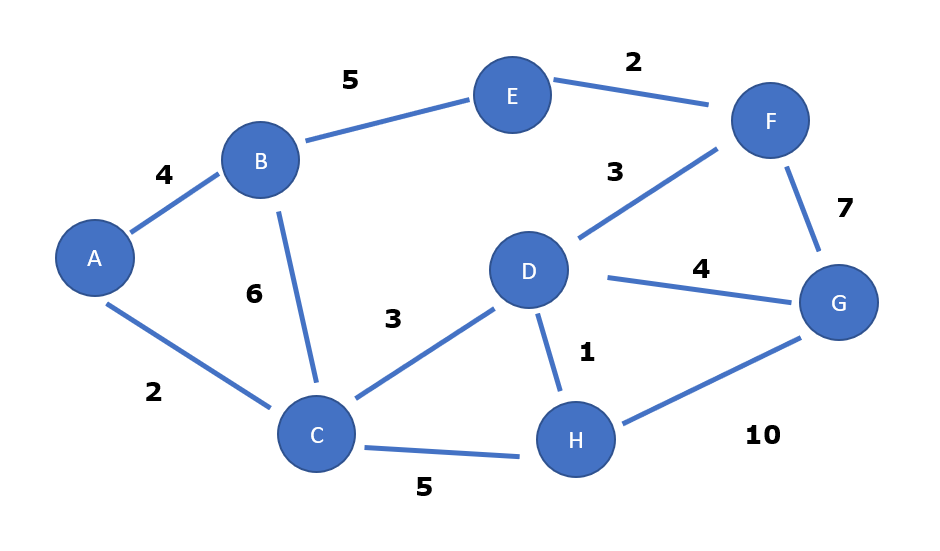


### Question 1
Rechercher le chemin le plus court entre le point A et le point G. Notez les différentes étapes, ainsi que la distance parcouru en total.

On représente ce graphe dans un premier temps sous forme de tableau:


| | A | B | C | D | E | F | G | H |
|:- |:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|A|0|4|2|-|-|-|-|-|
|B|4|0|6|-|5|-|-|-|
|C|2|6|0|3|-|-|-|5|
|D|-|-|3|0|3|4|1|-|
|E|-|5|-|-|0|2|-|-|
|F|-|-|-|3|2|0|7|-|
|G|-|-|-|4|-|7|0|10|
|H|-|-|5|1|-|-|10|0|

Puis on décide de modéliser ce graphe sous Python à l'aide d'une liste de listes:

In [ ]:
# Déclaration de notre graphe sous forme de liste de liste
graphe = [
    [0 ,4 ,2 ,99,99,99,99,99],
    [4 ,0 ,6 ,99,5 ,99,99,99],
    [2 ,6 ,0 ,3 ,99,99,5 ,99],
    [99,99,3 ,0 ,3 ,4 ,1 ,99],
    [99,5 ,99,99,0 ,2 ,99,99],
    [99,99,99,3 ,2 ,0 ,7 ,99],
    [99,99,99,4 ,99,7 ,0 ,10],
    [99,99,5 ,1 ,99,99,10,0 ]
]

graphe # Vérification de notre sortie

### Question 2:

 1. Quel choix a fait le développeur pour indiquer la non existence d'un arc entre deux sommets ?
 2. Ce choix vous semble t-il judicieux ? Argumentez.
 3. Que proposeriez-vous au développeur ? 

## Calcul de la distance entre deux sommets

Le calcul de la distance entre deux noeuds se fait à l'aide d'une fonction intitulé <b>distance</b> dont le code est donne ci dessous:

In [ ]:
def distance(départ, arrivée) -> int:
    # on vérifie que les valeurs de départ et arrivée sont bien des entiers
    assert type(départ) == int, "la valeur départ n'est pas un entier"
    assert type(arrivée) == int, "la valeur départ n'est pas un entier"
    assert graphe[départ][arrivée] != 99, "les noeuds ne sont pas adjacent"
 
    return(graphe[départ][arrivée])

### Question 3

 1. Que renvoie l'instruction $distance(2,3)$ ?
     1. 6
     2. "La valeur n'est pas un entier"
     3. 3
     4. 99
     
 2. Démonstration de la correction de cette fonction. 
   - Dans un premier temps montrez que la fonction se termine (pour rappel cela consiste a verifier que les calculs effectuées par l'algorithme s'arretent bien):
       1. Il n'y a aucune boucle dans la fonction, elle se termine forcément
       2. La fonction ne vérifie pas tout les cas possibles, elle ne se termine jamais dans certains cas
       3. Une fonction ne se termine que lorsqu'il y a une boucle "while"
   
   - Dans un deuxieme temps montrer la correction partielle (pour rappel: l'algorithme donne bien le bon résultat)
       1. Pour chaque couple de sommets la fonction retourne bien la distance demandée
       2. Le développeur n'a pas prévu le cas où l'on passe le même sommet en arrivée et départ
       3. L'algorithme ne donne pas le bon résultat.
       
 3. Quel est le niveau de complexité de cette fonction ? QCM
     1. Il s'agit du parcours séquentiel d'un tableau, $n \log(n)$
     2. $1$
     3. $n^2$
     4. $0$

## Création d'une liste de sommets adjacents

Maintenant que nous savons déterminer la distance entre deux noeuds, on a besoin de connaitre les différents parcours entre un point de départ et un point d'arrivée. On crée d'abord une fonction qui retourne la liste des noeuds adjacents par rapport a un noeud de référence.

In [ ]:
def determine_adjacents(sommet) -> list:
    #************************************************************************
    # A partir d'un noeud en entrée, la fonction donne la liste des noeuds adjacents
    # Entrée : Le noeud de départ
    # Sortie : la liste des noeuds adjacents
    #************************************************************************
    # On sélectionne la ligne contenant les noeuds adjacent par rapport a notre point de départ
    ligne = graphe[sommet]

    # on détermine le nombre de noeuds adjacents pour ce point
    nb_adjacent = len(ligne)-ligne.count(99)-ligne.count(0)

     # Puis on crée la variable parcours sous forme de liste de listes
    liste_adjacents = [[] for i in range(0,nb_adjacent)]

    a = 0
    for i in range(0,len(ligne)):
        if (ligne[i] != 0 and ligne[i] != 99):
            liste_adjacents[a].append(sommet)
            liste_adjacents[a].append(i)
            a += 1
            
    # On retourne la liste des sommet adjacents
    return(liste_adjacents)

#****************************************************************************
# Ajouter votre code ici pour l'exécution de la fonction ci-dessous

### Question 4

 1. Faites fonctionner la fonction $determine_adjacents$ pour l'ensemble des sommets du graphe, imprimez le résultat.
 2. Vérifier qu'il n'y ait pas d'erreur dans la transcription du graph. Le corriger le cas échéant.

## Composition d'une liste de listes avec l'ensemble des chemins possibles entre un point de départ et un point d'arrivée.

Pour commencer cette exercice, nous allons d'abord nous intéresser au nombre de noeuds adjacents par rapport a notre point de départ, puis, à partir de cette liste, nous allons bâtir l'ensemble des chemins possibles.

In [ ]:
def recursive2(liste) -> list:
    #************************************************************************
    # La fonction récursive établit la liste exhaustive des chemins possibles
    # Entrée : La liste de chemins déja établie
    # Sortie : la liste de chemins jusqu'au noeuds suivants
    #************************************************************************
   
    sommets_adjacents = []
    # On détermine le nombre d'arcs adjacents aux noeuds
    for i in range(0,len(liste)):                         # on boucle dans notre liste existante
        for element in determine_adjacents(liste[i][-1]): # pour chaque sommet dans la liste des adjacents
            if element not in sommets_adjacents:          # si le sommet n'est pas encore dans notre liste
                 sommets_adjacents.append(element)        # alors on le rajoute
   
    # On identifie les chemins qu'on doit créer, en ignorant les chemins:
        # - où on revient sur un noeud déja visité
        # - déja existant dans la liste
        # Puis on renseigne les chemins possibles

    entrees_a_supprimer = []                              # On va garder en mémoire les entrées a supprimer
    for i in range(0,len(liste)) :                        # on boucle dans notre liste existante
        if liste[i][-1] != arrivée:                       # on ignore les chemins menant déja au point d'arrivée
            for j in range(0,len(sommets_adjacents)):     # on boucle dans la liste qu'on vient d'obtenir
                if (sommets_adjacents[j][0] == liste[i][-1] and
                    sommets_adjacents[j][-1] != liste[i][0] and
                    sommets_adjacents[j][-1] not in liste[i]
                    ):
                    liste.append(liste[i] + sommets_adjacents[j][1:len(sommets_adjacents)])
            entrees_a_supprimer.append(i)                 # On va garder en mémoire les entrées a supprimer
            
    for i in range(0,len(entrees_a_supprimer)):           # avant de retourner notre résultat on supprime les entrées superflus
        del liste[entrees_a_supprimer[i]-i]
    return(liste)

### Question 5

En étudiant la fonction $recursive2$ ci-dessus, répondez aux questions suivantes:
 1. Identifier la ligne de code qui ajoute les chemins possible a la liste.
 2. Ecrivez le commentaire de cette ligne de code en langage naturel ou pseudocode.
 3. Quel est le coût de cette fonction ?
     1. Il s'agit du parcours séquentiel d'un tableau, le coût est linéaire ;
     2. Il s'agit d'un tri par insertion, au pire le coût de cette fonction est quadratique ($n^2$) ;
     3. Il s'agit d'un succession d'instructions simple, le cout est de 1.

## Programme principal

In [ ]:
#************************************************************************
# Transcription du graphe sous forme de liste de listes
#************************************************************************

graphe = [
    [0 ,4 ,2 ,99,99,99,99,99],
    [4 ,0 ,6 ,99,5 ,99,99,99],
    [2 ,6 ,0 ,3 ,99,99,99,5 ],
    [99,99,3 ,0 ,99,3 ,4 ,1 ],
    [99,5 ,99,99,0 ,2 ,99,99],
    [99,99,99,3 ,2 ,0 ,7 ,99],
    [99,99,99,4 ,99,7 ,0 ,10],
    [99,99,5 ,1 ,99,99,10,0 ]
    ]

def distance(Noeud_A, Noeud_B) -> int:
    #************************************************************************
    # Donne la distance entre deux noeuds adjacents Noeud_A et Noeud_B
    # Entrée : Le noeud de départ
    # Sortie : la liste des noeuds adjacents
    #************************************************************************
    # on vérifie que les valeurs de départ et arrivée sont bien des entiers
    assert type(Noeud_A) == int, "la valeur départ n'est pas un entier"
    assert type(Noeud_B) == int, "la valeur départ n'est pas un entier"
    assert graphe[Noeud_A][Noeud_B] != 99, "les noeuds ne sont pas adjacent"
    
    # On retourne la distance entre les deux noeuds
    return(graphe[Noeud_A][Noeud_B])


def determine_adjacents(noeud) -> list:
    #************************************************************************
    # A partir d'un noeud en entrée, la fonction donne la liste des noeuds adjacents
    # Entrée : Le noeud de départ
    # Sortie : la liste des noeuds adjacents
    #************************************************************************
    # On sélectionne la ligne contenant les noeuds adjacent par rapport a notre point de départ
    ligne = graphe[noeud]

    # on détermine le nombre de noeuds adjacents pour ce point
    nb_adjacent = len(ligne)-ligne.count(99)-ligne.count(0)

     # Puis on crée la variable parcours sous forme de liste de listes
    liste_adjacents = [[] for i in range(0,nb_adjacent)]

    a = 0
    for i in range(0,len(ligne)):
        if (ligne[i] != 0 and ligne[i] != 99):
            liste_adjacents[a].append(noeud)
            liste_adjacents[a].append(i)
            a += 1
            
    # On retourne la liste des noeuds adjacents
    return(liste_adjacents)

def recursive2(liste) -> list:
    #************************************************************************
    # La fonction récursive établit la liste exhaustive des chemins possibles
    # Entrée : La liste de chemins déja établie
    # Sortie : la liste de chemins jusqu'au noeuds suivants
    #************************************************************************
   
    sommets_adjacents = []
    # On détermine le nombre d'arcs adjacents aux noeuds
    for i in range(0,len(liste)): # on boucle dans notre liste existante
        for element in determine_adjacents(liste[i][-1]): # pour chaque sommet dans la liste des adjacents
            if element not in sommets_adjacents:          # si le sommets n'est pas encore dans notre liste
                 sommets_adjacents.append(element)        # alors on le rajoute
   
    # On identifie les chemins qu'on doit créer, en ignorant les chemins:
        # - où on revient sur un noeud déja visité
        # - déja existant dans la liste
        # Puis on renseigne les chemins possibles

    entrees_a_supprimer = []                              # On va garder en mémoire les entrées a supprimer
    for i in range(0,len(liste)) :                        # on boucle dans notre liste existante
        if liste[i][-1] != arrivée:                       # on ignore les chemins menant déja au point d'arrivée
            for j in range(0,len(sommets_adjacents)):     # on boucle dans la liste qu'on vient d'obtenir
                if (sommets_adjacents[j][0] == liste[i][-1] and
                    sommets_adjacents[j][-1] != liste[i][0] and
                    sommets_adjacents[j][-1] not in liste[i]
                    ):
                    liste.append(liste[i] + sommets_adjacents[j][1:len(sommets_adjacents)])
            entrees_a_supprimer.append(i)                 # On va garder en mémoire les entrées a supprimer
            
    for i in range(0,len(entrees_a_supprimer)):           # avant de retourner notre résultat on supprime les entrées superflus
        del liste[entrees_a_supprimer[i]-i]
    return(liste)


#********************************************************************************
# Début du programme principal
#********************************************************************************

# on définit un point de départ et d'arrivée
départ = 0
arrivée = 6


# On détermine le nombre d'arcs partant de notre sommet départ
liste_arcs_départs = determine_adjacents(départ)


# Construction de la liste de chemins possibles
for i in range(0,len(graphe)):
    liste_arcs_départs = recursive2(liste_arcs_départs)
    print(liste_arcs_départs)

# On imprime le nombre de chemins et les chemins possibles
print("Il y a",len(liste_arcs_départs),"chemins possibles:",liste_arcs_départs)

# On identifie le chemin le plus court
this_distance = 0
court_distance = 9999
court_chemin =[]

for element in liste_arcs_départs:
    this_distance = 0
    for i in range(0,len(element)-1):
        this_distance += distance(element[i],element[i+1])
    if this_distance < court_distance:
        court_distance = this_distance
        court_chemin = element
        
# Ecrivez votre réponse à la question 5.1 ici

### Question 6

1. Le programme ci dessous n'affiche pas le résultat attendu. Modifiez le pour qu'on vous affiche le chemin le plus court, et la distance a parcourir.
2. Implementez la fonction $timeit$ et $memit$ afin de connaître le temps d'exécution et la mémoire occupé par la fonction "recursive2"
3. Est-ce que les résultats confirment votre réponse à la question 4.3 ?

In [ ]:
pip install memory_profiler

In [ ]:
%load_ext memory_profiler

In [ ]:
# Déclaration des variables en fonction des itérations
chemins_it1 = [[0, 1], [0, 2]]
chemins_it3 = [[0, 1, 2, 3], [0, 1, 2, 7], [0, 1, 4, 5], [0, 2, 1, 4], [0, 2, 3, 5], [0, 2, 3, 6], [0, 2, 3, 7], [0, 2, 7, 3], [0, 2, 7, 6]]
chemins_it5 = [[0, 2, 3, 6], [0, 2, 7, 6], [0, 1, 2, 3, 6], [0, 1, 2, 7, 6], [0, 1, 4, 5, 6], [0, 2, 3, 5, 6], [0, 2, 3, 7, 6], [0, 2, 7, 3, 6], [0, 1, 2, 3, 5, 4], [0, 1, 2, 3, 5, 6], [0, 1, 2, 3, 7, 6], [0, 1, 2, 7, 3, 5], [0, 1, 2, 7, 3, 6], [0, 1, 4, 5, 3, 2], [0, 1, 4, 5, 3, 6], [0, 1, 4, 5, 3, 7], [0, 2, 1, 4, 5, 3], [0, 2, 1, 4, 5, 6], [0, 2, 3, 5, 4, 1], [0, 2, 7, 3, 5, 4], [0, 2, 7, 3, 5, 6]]
            
# Time and memory Profile
# # Ecrivez votre réponse à la question 5.2 ici